#Corrections

fix gemini gems index - original vs translation version

#What I learned

###1. Mahalanobis distance
- Euclidean vs Mahalanobis

      Euclidean distance assumes equal data distribution.
      Mahalanovis distances utilize inverse matrices of covariance matrices to reflect the structure of the data.
      That is, the distance of the data distribution is calculated by reflecting the information of the variance.

$$\Delta^2 = (\mathbf{y} - \boldsymbol{\mu})^T \boldsymbol{\Sigma}^{-1} (\mathbf{y} - \boldsymbol{\mu}) \ \ \ \  (\Delta:Mahalanobis \ distance)$$
$$$$
$$\Delta^2 = \sum_{j=1}^{d} \frac{(y_j - \mu_j)^2}{\sigma_j^2}$$
$$$$
$$\boldsymbol{\Sigma} = \mathbf{U} \boldsymbol{\Lambda} \mathbf{U}^T = \sum_{j=1}^D \lambda_j \mathbf{u}_j \mathbf{u}_j^T \ \ \ \ \ \ \ \ \ \ \ \boldsymbol{\Sigma}^{-1} = \mathbf{U} \boldsymbol{\Lambda}^{-1} \mathbf{U}^T = \sum_{j=1}^D \frac{1}{\lambda_j} \mathbf{u}_j \mathbf{u}_j^T \ \ \ \ \ (\boldsymbol{\Lambda} = \boldsymbol{\Sigma}^{-1})$$
$$$$
$$$$
$$z_j = \mathbf{u}_j^T (\mathbf{y} - \boldsymbol{\mu}) \ \ \ \ \ \ \ \ \boldsymbol{z} = \boldsymbol{U(y-\mu)}$$
$$$$
$$ then, \ \Delta^2 = (\mathbf{y} - \boldsymbol{\mu})^T \boldsymbol{\Sigma}^{-1} (\mathbf{y} - \boldsymbol{\mu}) = (\mathbf{y} - \boldsymbol{\mu})^T \left( \sum_{j=1}^D \frac{1}{\lambda_j} \mathbf{u}_j \mathbf{u}_j^T \right) (\mathbf{y} - \boldsymbol{\mu}) = \sum_{j=1}^D \frac{1}{\lambda_j}(\mathbf{y} - \boldsymbol{\mu})^T \mathbf{u}_j \mathbf{u}_j^T (\mathbf{y} - \boldsymbol{\mu}) = \sum_{j=1}^D \frac{z_j^2}{\lambda_j}$$

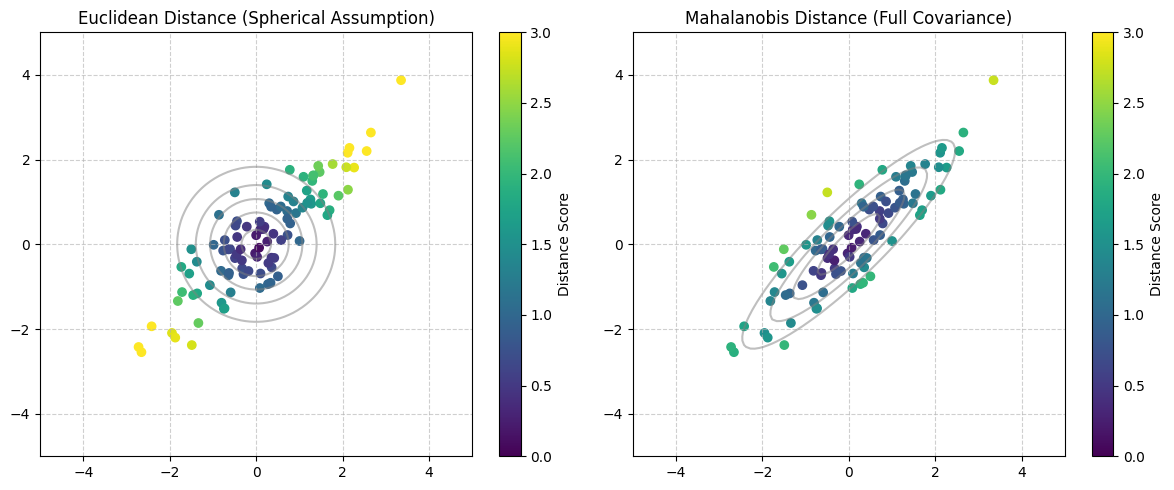

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# 1. 환경 설정 및 데이터 생성
np.random.seed(42)
mu = np.array([0, 0])

# 케이스 (a) Spherical: 유클리드 거리와 동일한 상태
cov_spherical = np.array([[1, 0], [0, 1]])

# 케이스 (b) Full: 상관관계가 있어 마할라노비스 거리가 필요한 상태
cov_full = np.array([[2, 1.8], [1.8, 2]])

# 랜덤 데이터 생성 (100개의 시점/샘플)
X = np.random.multivariate_normal(mu, cov_full, 100)

# 2. 마할라노비스 거리 직접 구현 (p. 147 수식 3.21)
def calculate_mahalanobis(y, mu, cov):
    y_diff = y - mu
    inv_cov = np.linalg.inv(cov)
    # 각 점에 대해 (y-mu)^T * Sigma^-1 * (y-mu) 계산
    d_sq = np.sum((y_diff @ inv_cov) * y_diff, axis=1)
    return np.sqrt(d_sq)

# 3. 거리 계산
dist_euclidean = np.sqrt(np.sum((X - mu)**2, axis=1)) # 단순 유클리드
dist_mahalanobis = calculate_mahalanobis(X, mu, cov_full) # 마할라노비스

# 4. 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 그리드 생성 (등고선용)
x_range = np.linspace(-5, 5, 100)
y_range = np.linspace(-5, 5, 100)
XX, YY = np.meshgrid(x_range, y_range)
pos = np.dstack((XX, YY))

# (a) 유클리드 거리 관점 (Spherical 등고선)
rv_sph = multivariate_normal(mu, cov_spherical)
axes[0].contour(XX, YY, rv_sph.pdf(pos), levels=5, colors='gray', alpha=0.5)
sc0 = axes[0].scatter(X[:, 0], X[:, 1], c=dist_euclidean, cmap='viridis', vmin=0, vmax=3)
axes[0].set_title("Euclidean Distance (Spherical Assumption)")
plt.colorbar(sc0, ax=axes[0], label='Distance Score')

# (b) 마할라노비스 거리 관점 (Full 등고선)
# p. 147에 따르면 MVN의 등고선은 마할라노비스 거리가 일정한 지점들의 집합입니다.
rv_full = multivariate_normal(mu, cov_full)
axes[1].contour(XX, YY, rv_full.pdf(pos), levels=5, colors='gray', alpha=0.5)
sc1 = axes[1].scatter(X[:, 0], X[:, 1], c=dist_mahalanobis, cmap='viridis', vmin=0, vmax=3)
axes[1].set_title("Mahalanobis Distance (Full Covariance)")
plt.colorbar(sc1, ax=axes[1], label='Distance Score')

for ax in axes:
    ax.set_xlim(-5, 5); ax.set_ylim(-5, 5)
    ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()